In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import re
import sys 
import statsmodels.stats.multitest
#sys.path.append('C:\\Users\\brittany\\henderson\\GitHub\\GBM_for_CPTAC\\')
#import cis_functions as f
#sys.path.append('C:\\Users\\Lindsey\\Documents\\GitHub\\WhenMutationsDontMatter\\')
#import plot_utils as p


import cptac
import cptac.utils as u

/Users/Lindsey/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
cptac warning: Your version of cptac (0.7.2) is out-of-date. Latest is 0.7.5. Please run 'pip install --upgrade cptac' to update it. (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 15)


In [5]:
df = pd.read_csv("pancan_EGFR_phospho.csv")
df = df.drop(['Unnamed: 0'], axis=1)
#filtered_data = df[df["Comparison"]== "ARG1"]

df = df.drop([0])
df.head(60)

,Comparison,Correlation_Gbm,P_value_Gbm,Correlation_kidney,P_value_kidney,Correlation_Ovar,P_value_Ovar,Correlation_Brca,P_value_Brca,Correlation_Luad,P_value_Luad,Correlation_hnscc,P_value_hnscc,Correlation_colon,P_value_colon,Correlation_Lscc,P_value_Lscc
1,EGFR_phosphoproteomics_T1046,0.823906,2.067960e-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,EGFR_phosphoproteomics_Y1172,0.819459,3.490814e-25,NaN,NaN,0.420270,0.011948,NaN,NaN,0.656540,6.792539e-14,0.833804,7.375490e-17,NaN,NaN,0.800729,5.791519e-22
3,EGFR_phosphoproteomics_S991,0.790899,2.079575e-22,NaN,NaN,NaN,NaN,0.332646,3.597030e-02,0.637149,7.252109e-14,0.754687,2.631905e-21,0.171256,0.183228,0.608766,1.719937e-12
4,EGFR_phosphoproteomics_Y1197,0.807444,4.155461e-22,NaN,NaN,NaN,NaN,NaN,NaN,0.694622,2.994042e-15,0.841558,4.871114e-29,NaN,NaN,0.765197,4.598745e-20
5,EGFR_phosphoproteomics_S1166Y1172,0.762266,4.978895e-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.852784,7.418290e-15,NaN,NaN,NaN,NaN
6,EGFR_phosphoproteomics_S1064,0.833365,5.880298e-20,NaN,NaN,0.446408,0.006351,0.828313,7.150860e-12,0.808056,1.430853e-26,NaN,NaN,0.109066,0.603786,0.892423,2.202225e-37
7,EGFR_phosphoproteomics_S1042,0.758922,8.977225e-20,NaN,NaN,NaN,NaN,NaN,NaN,0.540890,2.156024e-09,0.647737,2.693954e-14,0.230606,0.182603,NaN,NaN
8,EGFR_phosphoproteomics_S1045T1046,0.776951,1.402680e-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,EGFR_phosphoproteomics_T693,0.723137,2.855220e-17,NaN,NaN,0.535819,0.005769,0.744355,2.773845e-17,0.760275,5.838451e-22,0.723745,6.088243e-19,0.357781,0.000536,0.815182,2.274316e-27
10,EGFR_phosphoproteomics_S695,0.697115,1.546160e-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
pd.set_option('display.max_columns', 25)
df2 = df.set_index('Comparison')
#df2 = df.dropna(thresh=10, axis=0)
df2["Average_Pval"] = df2.loc[:,["P_value_Gbm","P_value_kidney","P_value_Ovar","P_value_Brca","P_value_Luad","P_value_hnscc","P_value_colon","P_value_Lscc"]].mean(axis = 1)
df2["SD_Pval"] = df2.loc[:,["P_value_Gbm","P_value_kidney","P_value_Ovar","P_value_Brca","P_value_Luad","P_value_hnscc","P_value_colon","P_value_Lscc"]].std(axis = 1)
df2 = df2.sort_values(by ='Average_Pval' )
df2

,Correlation_Gbm,P_value_Gbm,Correlation_kidney,P_value_kidney,Correlation_Ovar,P_value_Ovar,Correlation_Brca,P_value_Brca,Correlation_Luad,P_value_Luad,Correlation_hnscc,P_value_hnscc,Correlation_colon,P_value_colon,Correlation_Lscc,P_value_Lscc,Average_Pval,SD_Pval
Comparison,,,,,,,,,,,,,,,,,,
EGFR_phosphoproteomics_T1046,0.823906,2.067960e-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.067960e-25,NaN
EGFR_phosphoproteomics_S1042S1045N1053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.773589,3.975640e-20,3.975640e-20,NaN
EGFR_phosphoproteomics_S1045T1046,0.776951,1.402680e-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.402680e-19,NaN
EGFR_phosphoproteomics_Y1197,0.807444,4.155461e-22,NaN,NaN,NaN,NaN,NaN,NaN,0.694622,2.994042e-15,0.841558,4.871114e-29,NaN,NaN,0.765197,4.598745e-20,7.485221e-16,1.497013e-15
EGFR_phosphoproteomics_S695,0.697115,1.546160e-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.546160e-15,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF148_phosphoproteomics_T669T670,NaN,NaN,-0.000030,0.999813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.998126e-01,NaN
GAB1_phosphoproteomics_T365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.00004,0.999819,NaN,NaN,9.998189e-01,NaN
ZBTB7A_phosphoproteomics_T517S526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000017,9.998748e-01,9.998748e-01,NaN


Text(0, 0.5, 'Counts')

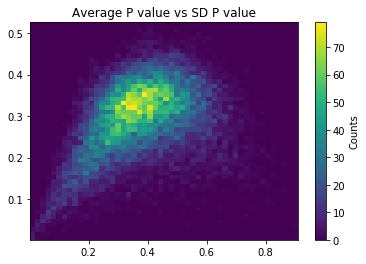

In [282]:
df1_subset = df2[["Average_Pval","SD_Pval"]]
#df1_subset.columns = df1_subset.columns.droplevel(1)
#def create_lin_reg_graph(df1, df2, x_axis, y_axis, title):
df1_subset = df1_subset.dropna(axis=0, how="any")

x1 = df1_subset[["Average_Pval"]].values
y1 = df1_subset[["SD_Pval"]].values
x1 = x1[:,0]
y1 = y1[:,0]
plt.hist2d(x1,y1,bins=50)
plt.title("Average P value vs SD P value")
cbar = plt.colorbar()
cbar.ax.set_ylabel('Counts')

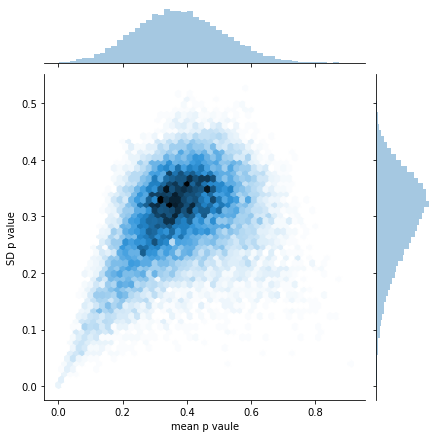

In [283]:
g = (sns.jointplot(x1, y1, kind="hex")
        .set_axis_labels("mean p vaule", "SD p value"))

plt.show()

In [7]:
df1_transposed = df2.T # or df1.transpose()

In [8]:
df1_transposed

Comparison,EGFR_phosphoproteomics_T1046,EGFR_phosphoproteomics_S1042S1045N1053,EGFR_phosphoproteomics_S1045T1046,EGFR_phosphoproteomics_Y1197,EGFR_phosphoproteomics_S695,EGFR_phosphoproteomics_S1166Y1172,EGFR_phosphoproteomics_S1113,PARD6B_phosphoproteomics_S291N301,EGFR_phosphoproteomics_S1153,MAPT_phosphoproteomics_S508,MYB_phosphoproteomics_S720,EGFR_phosphoproteomics_T640,...,CAMKV_phosphoproteomics_T435,PCLO_phosphoproteomics_S429,PLEKHA5_phosphoproteomics_S563,PALM_phosphoproteomics_S138T145,IRF2BP2_phosphoproteomics_T366,GMPS_phosphoproteomics_S313,CENPF_phosphoproteomics_S3150,ZNF148_phosphoproteomics_T669T670,GAB1_phosphoproteomics_T365,ZBTB7A_phosphoproteomics_T517S526,STK11IP_phosphoproteomics_S389,ABCF3_phosphoproteomics_S155
Correlation_Gbm,8.239064e-01,NaN,7.769505e-01,8.074435e-01,6.971153e-01,7.622657e-01,NaN,NaN,7.267786e-01,NaN,NaN,NaN,...,-0.00006,0.000089,-0.000082,-0.000046,NaN,-0.000064,NaN,NaN,NaN,NaN,NaN,NaN
P_value_Gbm,2.067960e-25,NaN,1.402680e-19,4.155461e-22,1.546160e-15,4.978895e-20,NaN,NaN,3.360398e-13,NaN,NaN,NaN,...,0.99960,0.999648,0.999671,0.999679,NaN,0.999702,NaN,NaN,NaN,NaN,NaN,NaN
Correlation_kidney,NaN,NaN,NaN,NaN,NaN,NaN,6.403056e-01,NaN,NaN,NaN,NaN,6.005289e-01,...,NaN,NaN,NaN,NaN,-0.000053,NaN,NaN,-0.000030,NaN,NaN,NaN,-0.000004
P_value_kidney,NaN,NaN,NaN,NaN,NaN,NaN,4.996706e-14,NaN,NaN,NaN,NaN,4.068052e-12,...,NaN,NaN,NaN,NaN,0.999697,NaN,NaN,0.999813,NaN,NaN,NaN,0.999977
Correlation_Ovar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P_value_Ovar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Correlation_Brca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-6.399059e-01,NaN,-5.984981e-01,-6.117054e-01,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P_value_Brca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000658e-13,NaN,1.617844e-12,2.574488e-12,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Correlation_Luad,NaN,NaN,NaN,6.946221e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000012,NaN
P_value_Luad,NaN,NaN,NaN,2.994042e-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.999933,NaN


In [218]:
#df1 = df1_transposed.drop(columns=['EGFR_phosphoproteomics_']) # drop less freq EGFR mutation cancers

In [67]:
df1 = df1_transposed.filter(like='EGFR_phosphoproteomics_Y', axis=1)
df1

Comparison,EGFR_phosphoproteomics_Y1197,EGFR_phosphoproteomics_Y1119,EGFR_phosphoproteomics_Y1110,EGFR_phosphoproteomics_Y1144,EGFR_phosphoproteomics_Y998,EGFR_phosphoproteomics_Y1172,EGFR_phosphoproteomics_Y1039,EGFR_phosphoproteomics_Y963,EGFR_phosphoproteomics_Y1092
Correlation_Gbm,8.074435e-01,NaN,6.082145e-01,NaN,0.513246,8.194589e-01,NaN,NaN,7.907597e-01
P_value_Gbm,4.155461e-22,NaN,1.355402e-09,NaN,0.000312,3.490814e-25,NaN,NaN,7.693612e-15
Correlation_kidney,NaN,6.426680e-01,NaN,0.520146,NaN,NaN,0.422516,0.186477,NaN
P_value_kidney,NaN,1.477123e-11,NaN,0.000091,NaN,NaN,0.003091,0.146724,NaN
Correlation_Ovar,NaN,NaN,NaN,NaN,NaN,4.202698e-01,NaN,NaN,NaN
P_value_Ovar,NaN,NaN,NaN,NaN,NaN,1.194812e-02,NaN,NaN,NaN
Correlation_Brca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P_value_Brca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Correlation_Luad,6.946221e-01,NaN,NaN,NaN,NaN,6.565403e-01,NaN,NaN,7.760991e-01
P_value_Luad,2.994042e-15,NaN,NaN,NaN,NaN,6.792539e-14,NaN,NaN,1.795249e-07


In [277]:
#pd.set_option('display.max_columns', 25)
#df = df.set_index('Comparison')
pathway = ["EGFR_phosphoproteomics_Y1092","EGFR_phosphoproteomics_Y1197","EGFR_phosphoproteomics_Y1172","EGFR_phosphoproteomics_Y1110"]


df1_transposed = df1_transposed.loc[:, ~df1_transposed.columns.str.startswith('EGFR')]

df1_transposed
#MapKinase.to_csv(r'/Users/Lindsey/Documents/MapKinase2.csv')

Comparison,NDRG1_phosphoproteomics_S319,ELF1_phosphoproteomics_S187,NDRG1_phosphoproteomics_S326T328S330,RCSD1_phosphoproteomics_S268,CARMIL2_phosphoproteomics_S1381,GLCCI1_phosphoproteomics_S406,MCC_phosphoproteomics_S389,FYB1_phosphoproteomics_S467,MICALL1_phosphoproteomics_S621,DSC2_phosphoproteomics_T805,AMPD2_phosphoproteomics_S292,TANC2_phosphoproteomics_S1977,...,SRCAP_phosphoproteomics_S2869,ASH1L_phosphoproteomics_S179,MCF2L_phosphoproteomics_S999,JRK_phosphoproteomics_S457,BZW2_phosphoproteomics_S412S414,MCM4_phosphoproteomics_T19,FAM122A_phosphoproteomics_S229S231,RRAGC_phosphoproteomics_S385,NONO_phosphoproteomics_T450,CD2BP2_phosphoproteomics_T243,LAP3_phosphoproteomics_S28,FBXO46_phosphoproteomics_T195
Correlation_Gbm,NaN,-2.483e-01,NaN,-3.713e-01,NaN,3.015e-01,0.262,-4.421e-01,NaN,NaN,-4.546e-01,NaN,...,1.534e-02,0.021,-0.026,0.016,NaN,0.045,0.006,0.017,-0.007,0.011,-0.015,NaN
P_value_Gbm,NaN,1.322e-02,NaN,1.546e-04,NaN,2.423e-03,0.013,4.615e-06,NaN,NaN,5.536e-04,NaN,...,9.058e-01,0.914,0.868,0.877,NaN,0.689,0.962,0.920,0.950,0.954,0.932,NaN
Correlation_kidney,2.469e-01,NaN,2.970e-01,-3.577e-01,-2.783e-01,-2.271e-01,0.359,-2.593e-01,-3.615e-01,NaN,4.525e-01,0.268,...,4.821e-03,0.058,0.031,-0.018,0.075,NaN,-0.014,0.070,-0.015,-0.009,0.004,-0.025
P_value_kidney,9.323e-03,NaN,2.975e-03,2.406e-04,5.060e-03,2.945e-02,0.002,6.234e-03,6.766e-04,NaN,1.114e-06,0.007,...,9.777e-01,0.803,0.867,0.874,0.683,NaN,0.888,0.517,0.878,0.924,0.967,0.840
Correlation_Ovar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.044,NaN,NaN,NaN,0.003,NaN,NaN,NaN,NaN
P_value_Ovar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.846,NaN,NaN,NaN,0.985,NaN,NaN,NaN,NaN
Correlation_Brca,5.671e-01,-3.111e-01,6.932e-01,-2.287e-01,-2.020e-01,-2.362e-01,-0.245,NaN,3.492e-01,0.406,3.890e-01,-0.175,...,5.156e-02,-0.016,0.057,0.006,-0.002,0.010,-0.016,NaN,-0.043,0.007,0.044,0.009
P_value_Brca,1.147e-09,7.147e-04,5.704e-11,1.397e-02,3.693e-02,1.106e-02,0.044,NaN,1.311e-04,0.002,3.042e-04,0.062,...,6.141e-01,0.884,0.655,0.958,0.984,0.925,0.888,NaN,0.648,0.947,0.745,0.939
Correlation_Luad,2.665e-01,-3.394e-01,2.088e-01,NaN,-4.205e-01,-2.550e-01,-0.279,-3.621e-01,-2.348e-01,-0.259,2.076e-01,0.250,...,8.716e-02,-0.053,-0.026,-0.138,0.002,-0.006,-0.002,-0.038,0.022,-0.063,-0.046,-0.015
P_value_Luad,4.888e-03,2.862e-04,3.517e-02,NaN,4.782e-06,7.179e-03,0.003,2.142e-04,1.357e-02,0.050,6.632e-02,0.008,...,5.784e-01,0.786,0.840,0.336,0.989,0.956,0.986,0.767,0.822,0.528,0.730,0.920


In [220]:
#df = ["GAB1_phosphoproteomics_Y447","GAB1_phosphoproteomics_Y447S454","BAD_phosphoproteomics_S134","RAF1_phosphoproteomics_S621","RAF1_phosphoproteomics_S259"]
pd.set_option("display.precision", 3)
#df1_transposed = df.T # or df1.transpose()
EGFR = df1_transposed[pathway]
EGFR

Comparison,EGFR_phosphoproteomics_Y1092,EGFR_phosphoproteomics_Y1197,EGFR_phosphoproteomics_Y1172,EGFR_phosphoproteomics_Y1110
Correlation_Gbm,7.908e-01,8.074e-01,8.195e-01,6.082e-01
P_value_Gbm,7.694e-15,4.155e-22,3.491e-25,1.355e-09
Correlation_kidney,NaN,NaN,NaN,NaN
P_value_kidney,NaN,NaN,NaN,NaN
Correlation_Ovar,NaN,NaN,4.203e-01,NaN
P_value_Ovar,NaN,NaN,1.195e-02,NaN
Correlation_Brca,NaN,NaN,NaN,NaN
P_value_Brca,NaN,NaN,NaN,NaN
Correlation_Luad,7.761e-01,6.946e-01,6.565e-01,NaN
P_value_Luad,1.795e-07,2.994e-15,6.793e-14,NaN


In [243]:
dfPTPN11 = df1_transposed.filter(like='PTPN11_phosphoproteomics', axis=1)

dfPTPN11 = dfPTPN11.loc[:,~dfPTPN11.columns.duplicated()]
dfPTPN11

Comparison,PTPN11_phosphoproteomics_Y62,PTPN11_phosphoproteomics_S562T568,PTPN11_phosphoproteomics_Y546,PTPN11_phosphoproteomics_Y584,PTPN11_phosphoproteomics_S562,PTPN11_phosphoproteomics_S558,PTPN11_phosphoproteomics_T191,PTPN11_phosphoproteomics_S36,PTPN11_phosphoproteomics_S142,PTPN11_phosphoproteomics_S34
Correlation_Gbm,6.785e-01,-0.357,-0.208,-0.140,-0.125,-0.140,-0.081,0.026,0.009,NaN
P_value_Gbm,1.190e-14,0.035,0.049,0.168,0.216,0.316,0.595,0.841,0.942,NaN
Correlation_kidney,4.358e-02,NaN,-0.171,-0.196,0.080,NaN,-0.060,0.102,NaN,0.102
P_value_kidney,6.652e-01,NaN,0.080,0.059,0.405,NaN,0.775,0.509,NaN,0.382
Correlation_Ovar,-1.886e-01,NaN,0.188,-0.119,0.124,NaN,NaN,NaN,NaN,NaN
P_value_Ovar,2.501e-01,NaN,0.146,0.504,0.563,NaN,NaN,NaN,NaN,NaN
Correlation_Brca,-2.154e-01,NaN,-0.063,0.051,-0.074,NaN,NaN,NaN,NaN,-0.084
P_value_Brca,2.081e-02,NaN,0.506,0.647,0.433,NaN,NaN,NaN,NaN,0.631
Correlation_Luad,4.238e-01,NaN,-0.078,-0.042,0.048,NaN,NaN,0.243,NaN,NaN
P_value_Luad,3.962e-06,NaN,0.421,0.674,0.627,NaN,NaN,0.117,NaN,NaN


In [234]:
pathway2 = ["RAF1_phosphoproteomics_S621","MAPK3_phosphoproteomics_Y204","MAPK3_phosphoproteomics_T202Y204","MAPK3_phosphoproteomics_T202","SHC1_phosphoproteomics_Y317"]
pathway2 = ["NCK1_phosphoproteomics_S166","NCK1_phosphoproteomics_S85","NCK1_phosphoproteomics_S91","NCK1_phosphoproteomics_S96","NCK1_phosphoproteomics_S262","NCK1_phosphoproteomics_Y105"]

RASpathway = df1_transposed[pathway2]

RASpathway = RASpathway.loc[:,~RASpathway.columns.duplicated()]
RASpathway

Comparison,NCK1_phosphoproteomics_S166,NCK1_phosphoproteomics_S85,NCK1_phosphoproteomics_S91,NCK1_phosphoproteomics_S96,NCK1_phosphoproteomics_S262,NCK1_phosphoproteomics_Y105
Correlation_Gbm,-4.326e-02,-0.336,NaN,NaN,-0.095,-0.015
P_value_Gbm,6.707e-01,0.004,NaN,NaN,0.587,0.885
Correlation_kidney,8.667e-02,-0.056,-0.068,NaN,-0.027,-0.250
P_value_kidney,3.888e-01,0.604,0.480,NaN,0.842,0.008
Correlation_Ovar,NaN,0.127,0.331,NaN,NaN,NaN
P_value_Ovar,NaN,0.388,0.143,NaN,NaN,NaN
Correlation_Brca,4.217e-02,0.170,0.018,0.282,NaN,0.137
P_value_Brca,6.545e-01,0.069,0.851,0.045,NaN,0.217
Correlation_Luad,8.387e-04,-0.053,-0.039,NaN,NaN,NaN
P_value_Luad,9.933e-01,0.595,0.701,NaN,NaN,NaN


In [244]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

pathway2 = ["STAT1_proteomics","JAK1_proteomics","JAK2_proteomics","STAT3_proteomics","SRC_proteomics"]
pathway3 = ["PTPN11_phosphoproteomics_Y62"]
pathway = df1_transposed[pathway3]

pathway

Comparison,PTPN11_phosphoproteomics_Y62
Correlation_Gbm,6.785e-01
P_value_Gbm,1.190e-14
Correlation_kidney,4.358e-02
P_value_kidney,6.652e-01
Correlation_Ovar,-1.886e-01
P_value_Ovar,2.501e-01
Correlation_Brca,-2.154e-01
P_value_Brca,2.081e-02
Correlation_Luad,4.238e-01
P_value_Luad,3.962e-06


In [57]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

pathwayAKT = ["PIP5K1C_proteomics","PIP5K1A_proteomics","PDPK1_proteomics","AKT1_proteomics","AKT2_proteomics","AKT3_proteomics","MTOR_proteomics","TP53_proteomics","CASP3_proteomics","CASP7_proteomics","CASP9_proteomics","CASP8_proteomics"]

pathwayAKTdf = df1_transposed[pathwayAKT]

pathwayAKTdf


Comparison,PIP5K1C_proteomics,PIP5K1A_proteomics,PDPK1_proteomics,AKT1_proteomics,AKT2_proteomics,AKT3_proteomics,MTOR_proteomics,TP53_proteomics,CASP3_proteomics,CASP7_proteomics,CASP9_proteomics,CASP8_proteomics
Correlation_Gbm,0.239,0.041,-0.125,0.078,0.210,-7.373e-02,0.204,-0.246,0.246,-3.380e-01,-5.809e-02,-0.312
P_value_Gbm,0.017,0.684,0.216,0.441,0.037,4.683e-01,0.042,0.036,0.014,6.230e-04,5.679e-01,0.002
Correlation_kidney,-0.111,-0.069,0.177,0.034,0.111,-7.967e-02,-0.155,-0.072,-0.199,6.022e-02,8.118e-02,NaN
P_value_kidney,0.249,0.480,0.064,0.721,0.246,4.080e-01,0.106,0.711,0.037,5.320e-01,3.992e-01,NaN
Correlation_Ovar,-0.014,-0.022,0.067,-0.101,-0.146,-1.180e-01,-0.109,-0.070,-0.319,4.202e-02,-3.719e-01,-0.140
P_value_Ovar,0.901,0.842,0.545,0.363,0.188,2.882e-01,0.327,0.531,0.003,7.061e-01,9.401e-04,0.207
Correlation_Brca,0.116,NaN,-0.254,-0.131,-0.095,3.070e-01,-0.125,0.190,0.097,-7.037e-02,-1.092e-01,0.090
P_value_Brca,0.216,NaN,0.006,0.164,0.311,8.461e-04,0.184,0.042,0.304,4.549e-01,2.455e-01,0.338
Correlation_Luad,-0.121,-0.191,NaN,0.045,0.058,-2.595e-01,NaN,0.022,-0.051,-3.039e-03,-9.008e-03,0.079
P_value_Luad,0.207,0.046,NaN,0.644,0.548,6.194e-03,NaN,0.844,0.599,9.749e-01,9.256e-01,0.568


In [287]:
df2

,Correlation_Gbm,P_value_Gbm,Correlation_kidney,P_value_kidney,Correlation_Ovar,P_value_Ovar,Correlation_Brca,P_value_Brca,Correlation_Luad,P_value_Luad,Correlation_hnscc,P_value_hnscc,Correlation_colon,P_value_colon,Correlation_Lscc,P_value_Lscc,Average_Pval,SD_Pval
Comparison,,,,,,,,,,,,,,,,,,
EGFR_phosphoproteomics_T693,0.723,2.855e-17,NaN,NaN,0.536,0.006,0.744,2.774e-17,0.760,5.838e-22,0.724,6.088e-19,0.358,5.360e-04,0.815,2.274e-27,9.007e-04,0.002
EGFR_phosphoproteomics_Y1172,0.819,3.491e-25,NaN,NaN,0.420,0.012,NaN,NaN,0.657,6.793e-14,0.834,7.375e-17,NaN,NaN,0.801,5.792e-22,2.390e-03,0.005
NDRG1_phosphoproteomics_S319,NaN,NaN,0.247,0.009,NaN,NaN,0.567,1.147e-09,0.267,4.888e-03,0.394,1.162e-03,NaN,NaN,0.288,2.291e-03,3.533e-03,0.004
ELF1_phosphoproteomics_S187,-0.248,1.322e-02,NaN,NaN,NaN,NaN,-0.311,7.147e-04,-0.339,2.862e-04,NaN,NaN,-0.279,6.736e-03,-0.357,1.296e-04,4.217e-03,0.006
NDRG1_phosphoproteomics_S326T328S330,NaN,NaN,0.297,0.003,NaN,NaN,0.693,5.704e-11,0.209,3.517e-02,0.370,7.633e-05,NaN,NaN,0.360,2.376e-04,7.692e-03,0.015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RRAGC_phosphoproteomics_S385,0.017,9.197e-01,0.070,0.517,0.003,0.985,NaN,NaN,-0.038,7.673e-01,NaN,NaN,NaN,NaN,-0.002,9.838e-01,8.347e-01,0.198
NONO_phosphoproteomics_T450,-0.007,9.501e-01,-0.015,0.878,NaN,NaN,-0.043,6.480e-01,0.022,8.225e-01,-0.030,7.550e-01,0.001,9.902e-01,NaN,NaN,8.407e-01,0.127
CD2BP2_phosphoproteomics_T243,0.011,9.538e-01,-0.009,0.924,NaN,NaN,0.007,9.470e-01,-0.063,5.276e-01,-0.003,9.758e-01,NaN,NaN,NaN,NaN,8.657e-01,0.190


KeyError: 'Comparison'

In [ ]:
#df["ranking_slope+pvalue"] = df1_merged1["ranking_slope"] + df1_merged1["ranking_pvalue"]
#df1_merged1.nlargest(20,"ranking_slope+pvalue")


In [ ]:
brain = cptac.Gbm()

In [ ]:
prot = brain.get_proteomics()
prot_list = prot.columns.values.tolist()
prot_list
for item in prot_list:
    if item.startswith('PAK'):
        print(item)


In [ ]:
df.hist(column='SD_Correlation', bins = 50)

In [ ]:
df_slope.hist(column='mean', bins = 50)

In [ ]:
plt.rcParams["figure.figsize"] = (12,10)
sns.set(font_scale = 1.3)
a = sns.distplot(df_slope["SD"], bins = 100).set_title('Histogram of SD of the Slopes from Regression Plots for Interacting EGFR Trans Effects')

In [ ]:
plt.rcParams["figure.figsize"] = (12,10)
sns.set(font_scale = 1.3)
a = sns.distplot(df_slope["mean"], bins = 100).set_title('Histogram of Mean of the Slope from Regression Plots for interacting EGFR and Trans Effects')

In [ ]:
plt.rcParams["figure.figsize"] = (12,10)
sns.set(font_scale = 1.3)
a = sns.distplot(df_pvalue["SD"], bins = 100).set_title('Histogram of SD of the P_value from Regression Plots for Interacting EGFR Trans Effects')

In [ ]:
df_other = pd.read_csv('pancan_EGFR_other.csv')
df_other = df_other.drop(['Unnamed: 0'], axis=1)
df_other

In [ ]:
df_pvalue_other = df_other.loc[:,["Comparison","P_value_Gbm","P_value_kidney","P_value_Endo","P_value_Ovar","P_value_Brca","P_value_Luad","P_value_hnscc","P_value_colon"]]
df_pvalue_other= df_pvalue_other.dropna(thresh = 6)
df_pvalue_other["SD_other"] = (df_pvalue_other.loc[:,["Comparison","P_value_Gbm","P_value_kidney","P_value_Endo","P_value_Ovar","P_value_Brca","P_value_Luad","P_value_hnscc","P_value_colon"]].std(axis = 1))
df_pvalue_other.nlargest(10, 'SD_other')

#df_pvalue_other = df_other.loc[:,["Comparison","SD"]]
#df_pvalue = df_pvalue.loc[:,["Comparison","SD"]]
merged =  pd.concat([df_pvalue, df_pvalue_other], axis=1, sort=False)
merged

In [ ]:
# Method 1: on the same Axis
sns.distplot( merged["SD_other"].dropna() , color="red", label="not interacting")
sns.distplot( merged["SD"].dropna() , color="skyblue", label="interacting")

plt.legend()

plt.title('Distribution of pvalues for interacting and non interacting EGFR trans effects')
plt.xlabel('pvalue')



In [ ]:
df_slope_other = df_other.loc[:,["Comparison","Slope_Gbm","Slope_kidney","Slope_Endo","Slope_Ovar","Slope_Brca","Slope_Luad","Slope_hnscc","Slope_colon"]]
df_slope_other= df_slope_other.dropna(thresh = 6)
df_slope_other["SD_other"] = (df_slope_other.loc[:,["Comparison","Slope_Gbm","Slope_kidney","Slope_Endo","Slope_Ovar","Slope_Brca","Slope_Luad","Slope_hnscc","Slope_colon"]].std(axis = 1))
df_slope_other.nlargest(10, 'SD_other')

#df_pvalue_other = df_other.loc[:,["Comparison","SD"]]
#df_pvalue = df_pvalue.loc[:,["Comparison","SD"]]
merged2 =  pd.concat([df_slope, df_slope_other], axis=1, sort=False)
merged2

In [ ]:
# Method 1: on the same Axis
sns.distplot( merged2["SD_other"].dropna() , color="red", label="not interacting")
sns.distplot( merged2["SD"].dropna() , color="skyblue", label="interacting")

plt.legend()

plt.title('Distribution of Correlation for interacting and non interacting EGFR trans effects')
plt.xlabel('pvalue')